In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
data_dir = "datasets\\"
data = pd.read_csv(data_dir + "1.csv")

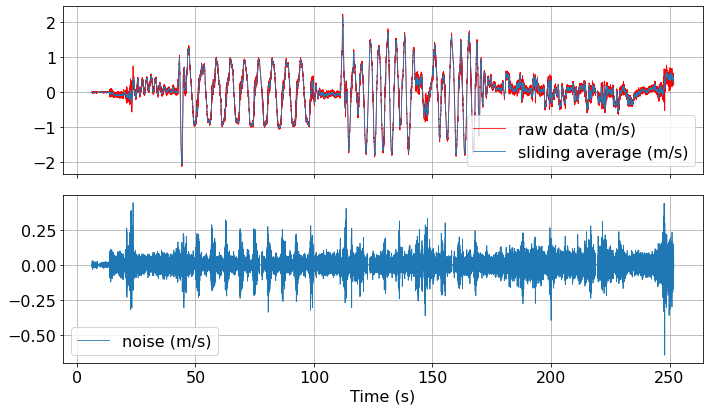

In [3]:
plt.rcParams["font.size"] = "16"
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
ax1.plot(data["timestamp"], data["windspeed_x"], "r", linewidth=0.8)
ax1.plot(data["timestamp"], data["avg"], linewidth=0.8)
ax1.legend(["raw data (m/s)", "sliding average (m/s)"])
ax1.grid()

ax2.plot(data["timestamp"], data["err"], linewidth=0.8)
ax2.set_xlabel("Time (s)")
ax2.legend(["noise (m/s)"])
ax2.grid()
plt.tight_layout()
plt.savefig("figures\\sliding.pdf")
plt.show()

In [4]:
data["err"].mean()

1.2408423433356361e-05

In [5]:
data["err"].var()

0.002531861831278257

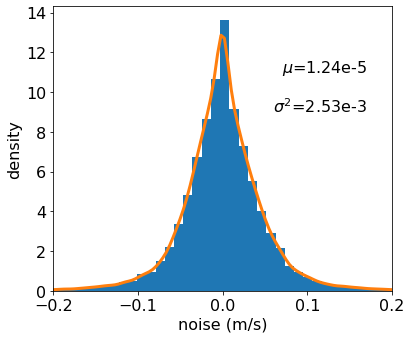

In [6]:
kde_func = stats.kde.gaussian_kde(data["err"])
x = np.linspace(-0.2, 0.2, 100)
density = kde_func(x)

plt.figure(figsize=(6, 5))
plt.hist(data["err"], bins=100, density=True)
plt.plot(x, density, linewidth=3)
plt.xlim([-0.2, 0.2])
plt.xlabel("noise (m/s)")
plt.ylabel("density")
plt.text(0.07, 11, r"$\mu$=1.24e-5")
plt.text(0.06, 9, r"$\sigma^2$=2.53e-3")
plt.tight_layout()
plt.savefig("figures\\noiseHisto_62.pdf")
plt.show()

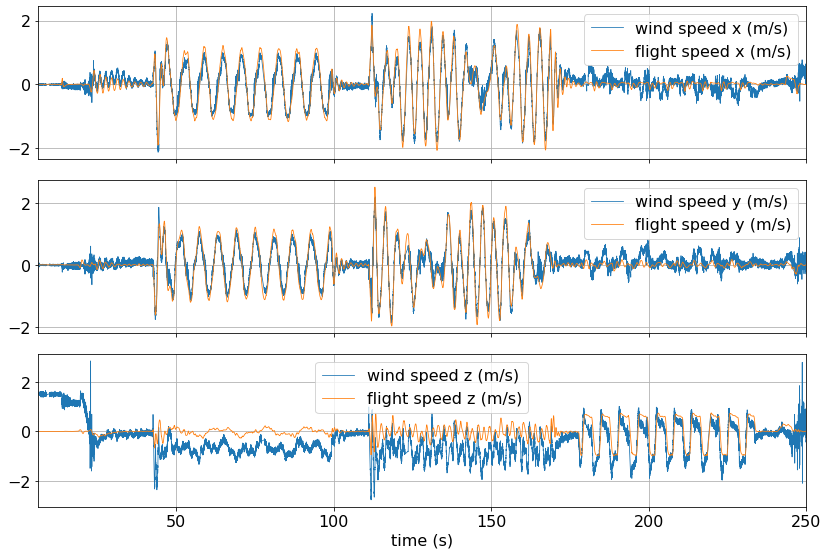

In [7]:
plt.rcParams["font.size"] = "16"
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(12, 8))
ax1.plot(data["timestamp"], data["windspeed[0]"], linewidth=0.8)
ax1.plot(data["timestamp"], data["ground_truth_velocity_xyz[0]"], linewidth=0.8)
ax1.legend(["wind speed x (m/s)", "flight speed x (m/s)"])
ax1.grid()
ax2.plot(data["timestamp"], data["windspeed[1]"], linewidth=0.8)
ax2.plot(data["timestamp"], data["ground_truth_velocity_xyz[1]"], linewidth=0.8)
ax2.legend(["wind speed y (m/s)", "flight speed y (m/s)"])
ax2.grid()
ax3.plot(data["timestamp"], data["windspeed[2]"], linewidth=0.8)
ax3.plot(data["timestamp"], data["ground_truth_velocity_xyz[2]"], linewidth=0.8)
ax3.legend(["wind speed z (m/s)", "flight speed z (m/s)"])
ax3.grid()
plt.xlim([6, 250])
plt.xlabel("time (s)")
plt.tight_layout()
plt.savefig("figures//speed.pdf")
plt.show()